## 데이터 로드
- 럭키백 이벤트 실습(로지스틱 회귀) 사용한 생선 데이터를 로드합니다: 'https://bit.ly/fish_csv'
- 품종(Species)을 타깃값으로, 나머지 컬럼을 입력값으로 사용합니다.
- 표준 점수로 전처리 합니다.
- 훈련/테스트 셋을 분할하지 않습니다.

In [1]:
import pandas as pd
df = pd.read_csv("https://bit.ly/fish_csv")
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
from sklearn.preprocessing import StandardScaler
target = df['Species'].copy()
data = df.copy().drop(columns=['Species'])

s = StandardScaler()
data_scaled = s.fit_transform(data)

## K-means 군집
- 입력 특성을 이용해 (무게, 길이, 대각선 길이, 높이, 너비) k-means 알고리즘으로 군집을 찾습니다.
- 군집의 개수 k는 2에서 9까지 변경해 가며 엘보우 방법으로 결정합니다. (random_state=42)
- 최적의 k로 군집을 찾은 후 군집 별 데이터 수에 대한 분포를 히스토그램으로 시각화합니다. 

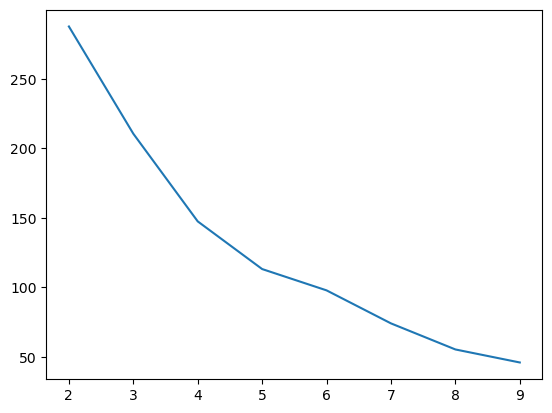

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.show()

In [4]:
# 3?
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(data_scaled)
km.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int32)

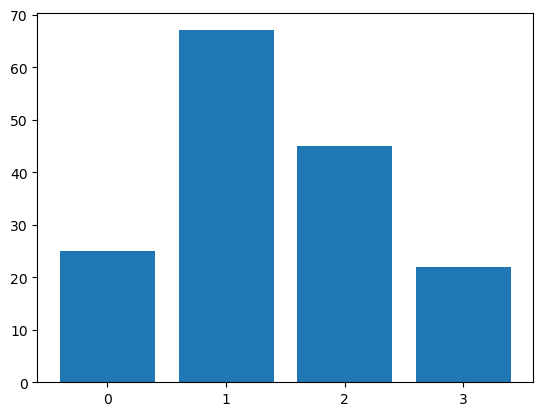

In [5]:
data["Cluster"] = km.labels_
cluster_counts = data["Cluster"].value_counts()
# 히스토그램 시각화
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xticks(cluster_counts.index)  # 군집 레이블
plt.show()

- PCA를 이용해 입력 데이터를 2개의 차원으로 축소 후, 실제 생선 수인 7로 K 를 지정해 군집을 찾고 시각화합니다. 각 군집을 다른 색으로 나타낼 수 있도록 합니다.

In [6]:
from sklearn.decomposition import PCA

data = df.copy().drop(columns=['Species'])

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data)
print(data_pca.shape)

(159, 2)


In [7]:
km = KMeans(n_clusters = 7, random_state=42)
km.fit(data_pca)
km.labels_

array([4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 6, 6, 6, 6, 6, 6, 2, 6,
       6, 6, 6, 6, 6, 6, 0, 5, 0, 5, 0, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 2, 4, 4, 4, 2, 0, 5, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 0, 6, 6, 6, 6, 0, 6, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 4, 4, 4, 4,
       2, 4, 2, 2, 2, 2, 2, 0, 5, 5, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

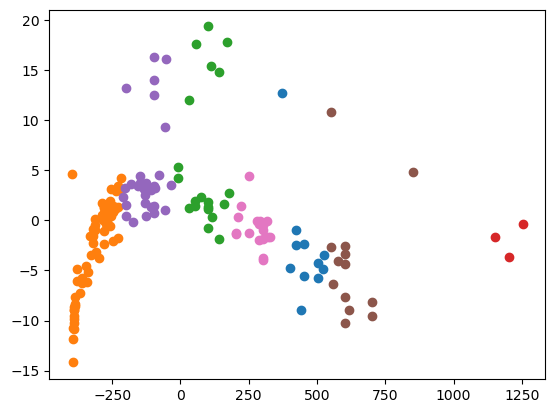

In [8]:
for label in range(0, 7):
    d = data_pca[km.labels_ == label]
    plt.scatter(d[:,0], d[:,1])

plt.show()

- 군집 결과와 실제 생선 라벨의 관계를 조사하기 위해, 차원 축소 데이터로 타깃 라벨 정보를 시각화합니다. 각 라벨(다른 종류의 생선) 별로 다른 색으로 점이 그려질 수 있도록 합니다.

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


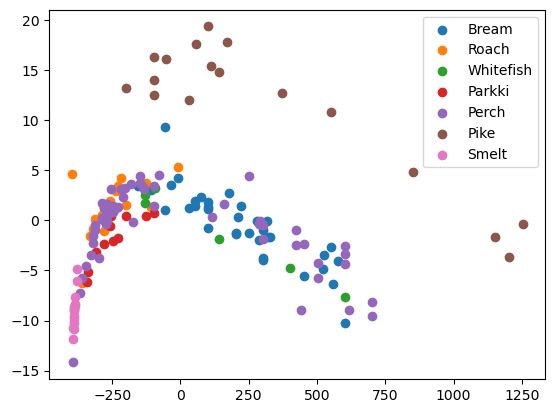

Object `?K평균알고리즘이 잘못돼ㅣㄴ거같ㅇㄴ데` not found.


In [69]:
print(target)
unique_labels = target.unique()
print(unique_labels)

for label in unique_labels:
    label_points = data_pca[label == target]
    plt.scatter(label_points[:,0], label_points[:,1], label=label)

plt.legend()
plt.show()
???K평균알고리즘이 잘못돼ㅣㄴ거같ㅇㄴ데

## 고찰
위 결과에 대해 고찰합니다.